In [1]:
# http://geopandas.org/
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
%matplotlib inline

counties = gpd.read_file('data/MED2014_HD_Full.shp')

counties.describe()


,AREA_SQ_KM,LAND_AREA_,OBJECTID,SHAPE_AREA,SHAPE_LENG
count,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61251.418016,38154.990979,4.000000,6.125142e+10,1.433618e+06
std,78721.552701,51414.948978,2.160247,7.872158e+10,9.339237e+05
min,1368.377736,575.224911,1.000000,1.368378e+09,2.079492e+05
25%,25734.076593,14956.101846,2.500000,2.573379e+10,1.026975e+06
50%,43940.981612,18323.465773,4.000000,4.394098e+10,1.305126e+06
75%,48170.713886,33261.511972,5.500000,4.817100e+10,1.621760e+06
max,235640.985809,151751.018532,7.000000,2.356410e+11,3.224778e+06


{'lat_0': 0, 'units': 'm', 'y_0': 10000000, 'ellps': 'GRS80', 'k': 0.9996, 'x_0': 1600000, 'lon_0': 173, 'proj': 'tmerc', 'no_defs': True}


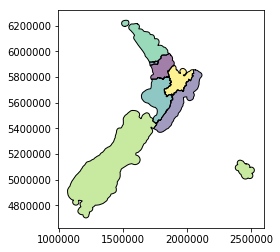

In [13]:
print(counties.crs)
counties.plot()

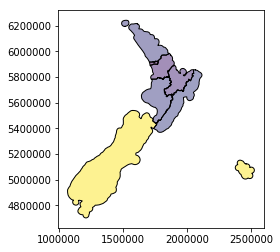

In [15]:
# http://matplotlib.org/users/colormaps.html
counties.plot(column='AREA_SQ_KM', cmap='viridis');

In [ ]:
Geopandas provides a high-level interface to the matplotlib library for making maps. 
Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.

Loading some included example data into GeoDataFrames (geo-enabled version of Pandas Dataframe):

In [29]:
# load example data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head(5)

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [30]:
# Check original projection
# (it's Platte Carre! x-y are long and lat)
print(world.crs)

# and get some basic descriptive statisitics
world.describe()

{'init': 'epsg:4326'}


,gdp_md_est,pop_est
count,1.770000e+02,1.770000e+02
mean,3.932774e+05,3.827399e+07
std,1.388562e+06,1.374613e+08
min,-9.900000e+01,-9.900000e+01
25%,1.316000e+04,3.441790e+06
50%,4.327000e+04,9.035536e+06
75%,2.329000e+05,2.594622e+07
max,1.509400e+07,1.338613e+09


geopandas makes it easy to create Chloropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.

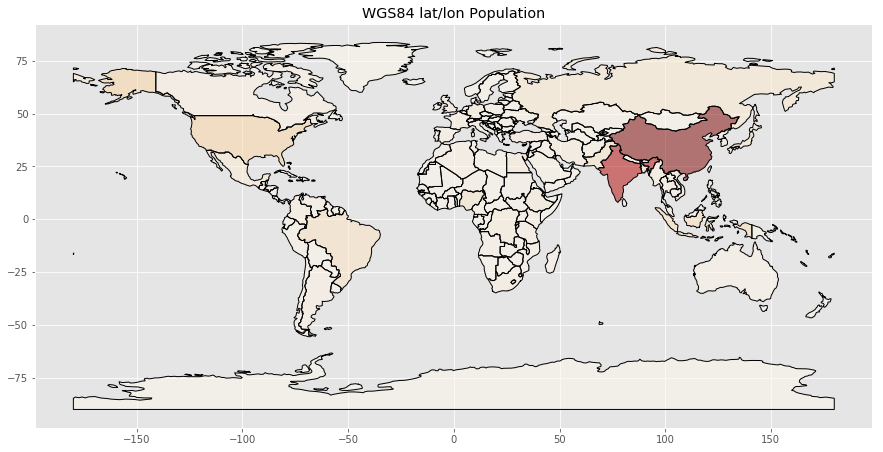

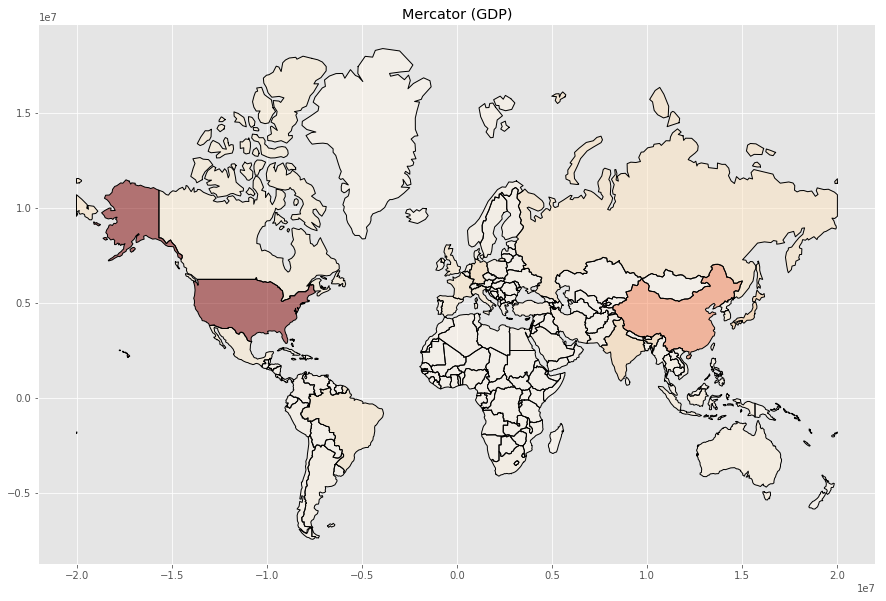

In [38]:
# Visualize
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

ax = world.plot(column='pop_est', cmap='OrRd');

ax.set_title("WGS84 lat/lon Population");

# Reproject to Mercator (after dropping Antartica)
world2 = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world3 = world2.to_crs({'init': 'epsg:3395'}) # world.to_crs(epsg=3395) would also work

ax = world3.plot(column='gdp_md_est', cmap='OrRd');
ax.set_title("Mercator (GDP)");

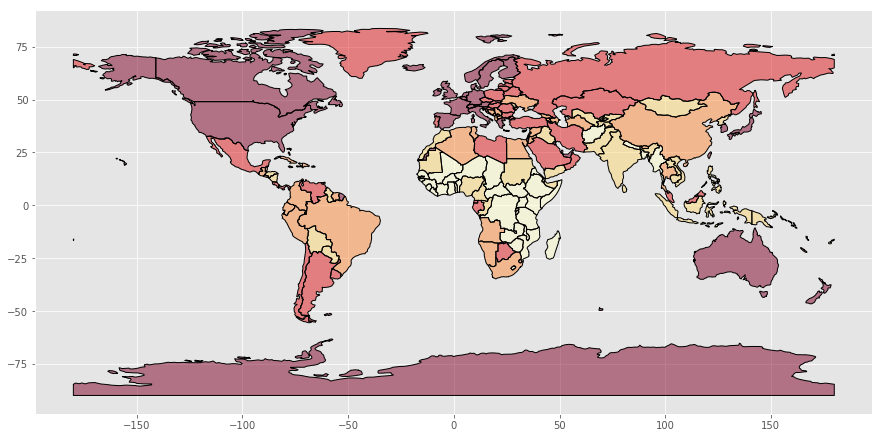

In [39]:
# reset again
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

# world.plot(column='gdp_per_cap');
world.plot(column='gdp_per_cap', cmap='YlOrRd', scheme='quantiles');

## Maps with Layers

There are two strategies for making a map with multiple layers – one more succinct, and one that is a littel more flexible.

Before combining maps, however, remember to always ensure they share a common CRS (so they will align).

In [40]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,geometry,name
0,POINT (12.45338654497177 41.90328217996012),Vatican City
1,POINT (12.44177015780014 43.936095834768),San Marino
2,POINT (9.516669472907267 47.13372377429357),Vaduz
3,POINT (6.130002806227083 49.61166037912108),Luxembourg
4,POINT (158.1499743237623 6.916643696007725),Palikir


{'init': 'epsg:4326'}


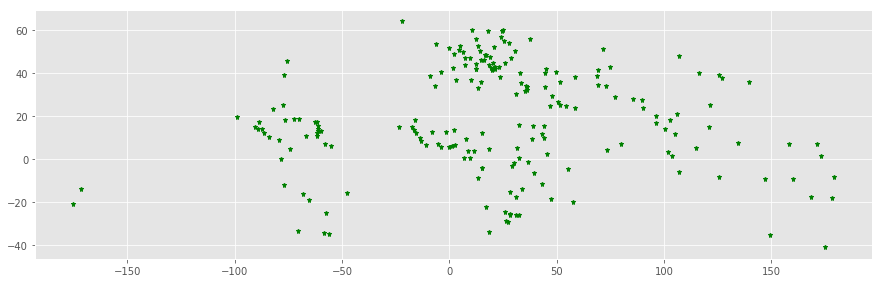

In [44]:
print(cities.crs)
cities.plot(marker='*', color='green', markersize=5);

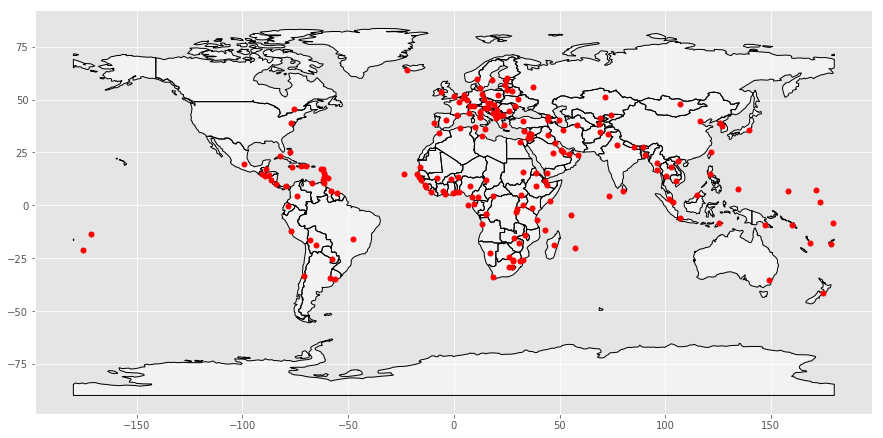

In [45]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);